In [239]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [240]:
# display options
pd.set_option('display.max_columns', None)

In [241]:
# read dataset
df = pd.read_csv('Loan_Default.csv')

In [242]:
# first five rows
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [243]:
# dataset shape
df.shape

(148670, 34)

In [244]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [245]:
# change dtype of Status and term
df = df.astype({'term':'object', 'Status':'object'})

In [246]:
# null values
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

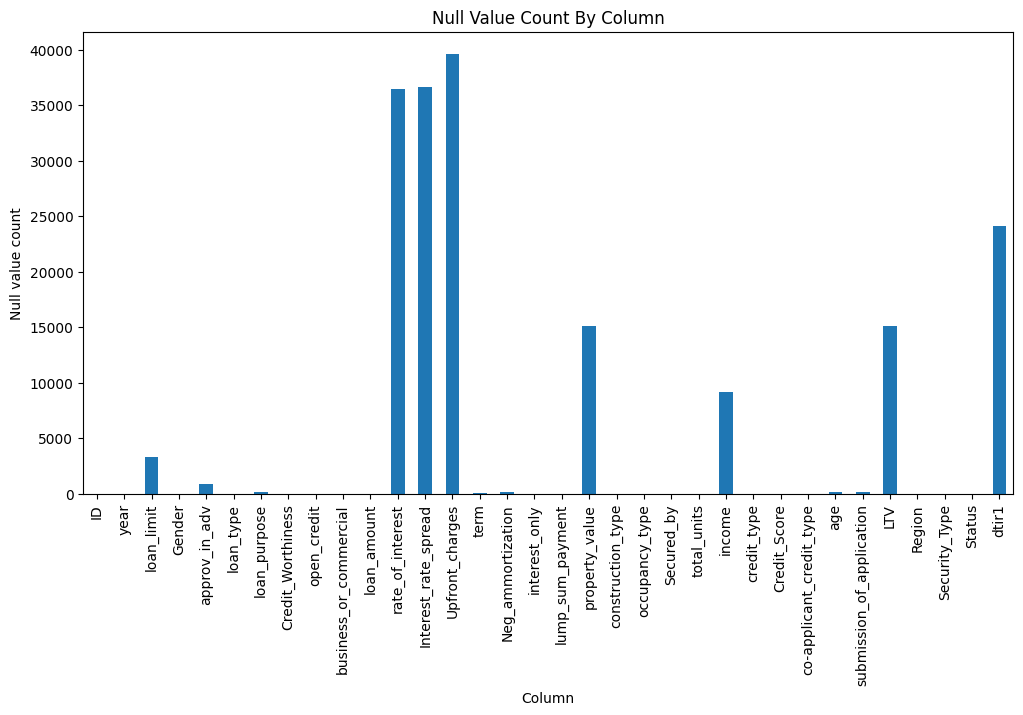

In [247]:
# plot null value count
plt.figure(figsize=(12, 6))
df.isnull().sum().plot.bar()
plt.title('Null Value Count By Column')
plt.xlabel('Column')
plt.ylabel('Null value count')
plt.xticks(rotation = 90)
plt.show()

In [248]:
# remove ID and year 
df_1 = df.drop(['ID','year'], axis=1)
df_1.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [249]:
# checking for unique values
df_1.nunique().sum

<bound method Series.sum of loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      2
business_or_commercial           2
loan_amount                    211
rate_of_interest               131
Interest_rate_spread         22516
Upfront_charges              58271
term                            26
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 385
construction_type                2
occupancy_type                   3
Secured_by                       2
total_units                      4
income                        1001
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
age                              7
submission_of_application        2
LTV                        

In [250]:
# separate categorical and numerical columns
categorical_cols = []
numerical_cols = []
for col in df_1.columns:
    if(df_1[col].dtype == 'object'):
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [251]:
print('Categorical columns: \n', categorical_cols)
print('\n')
print('Numerical columns: \n', numerical_cols)

Categorical columns: 
 ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type', 'Status']


Numerical columns: 
 ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']


In [252]:
# imputing missing values of numerical columns with means
df_1_num = df_1[numerical_cols]
num_means = df_1_num.mean()

In [253]:
df_1_num.fillna(num_means, inplace=True)

In [254]:
df_1_num.isnull().sum()

loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
property_value          0
income                  0
Credit_Score            0
LTV                     0
dtir1                   0
dtype: int64

In [255]:
# checking for unique values in categorical columns to find any inconsistencies
df_1_cat = df_1[categorical_cols]
for col in categorical_cols:
    print(df_1_cat[col].value_counts(), "\n")    

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64 

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64 

approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64 

loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64 

loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64 

Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64 

open_credit
nopc    148114
opc        556
Name: count, dtype: int64 

business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64 

term
360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0  

In [257]:
# imputing missing values of categorical columns with modes
for col in categorical_cols:
    cat_mode = df_1_cat[col].mode()
    cat_mode = cat_mode[0]
    df_1_cat[col].fillna(value=cat_mode, inplace=True)

In [258]:
df_1_cat = df_1_cat.astype({'term':'object'})

In [259]:
df_1_cat.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
Status                       0
dtype: int64

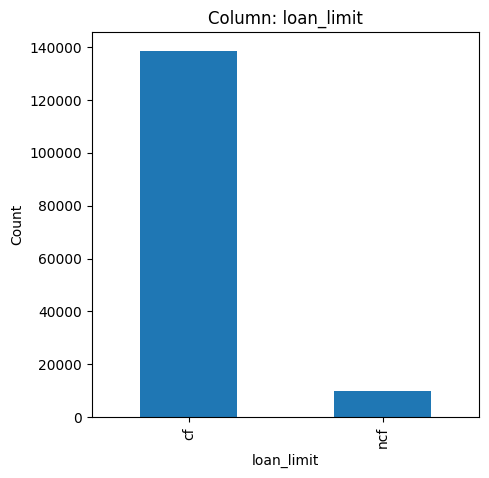

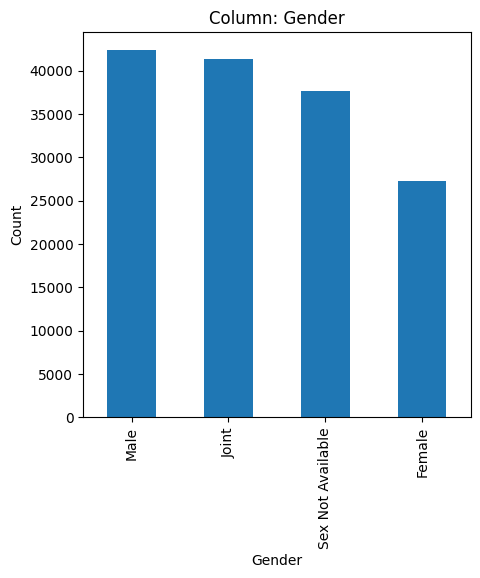

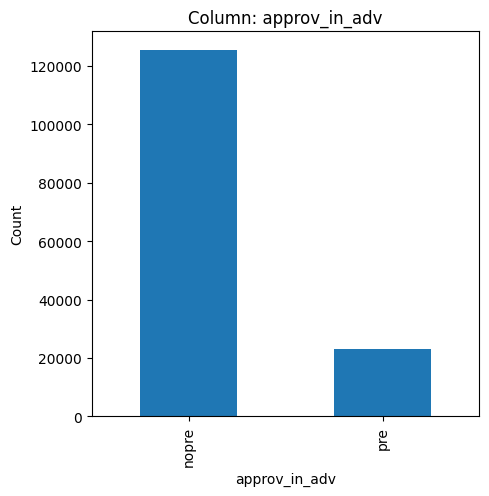

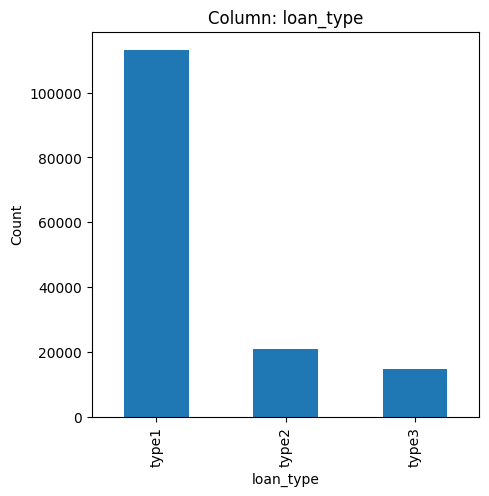

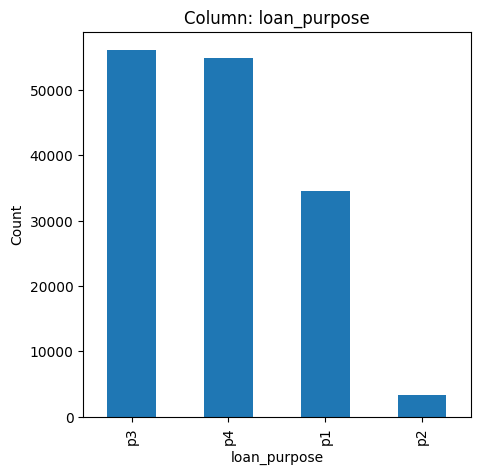

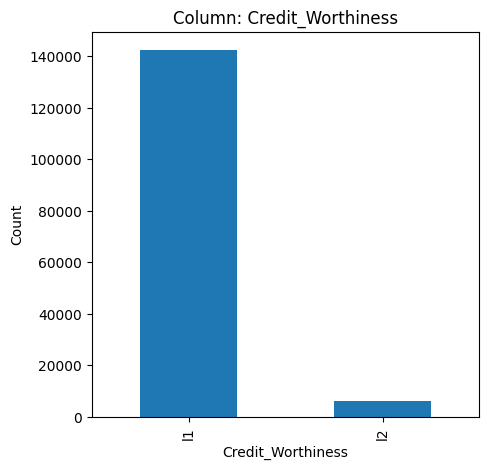

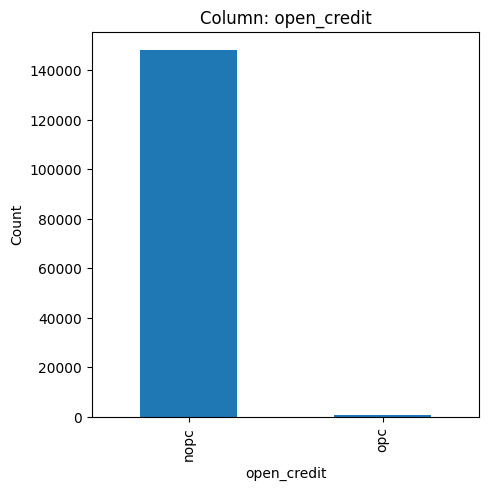

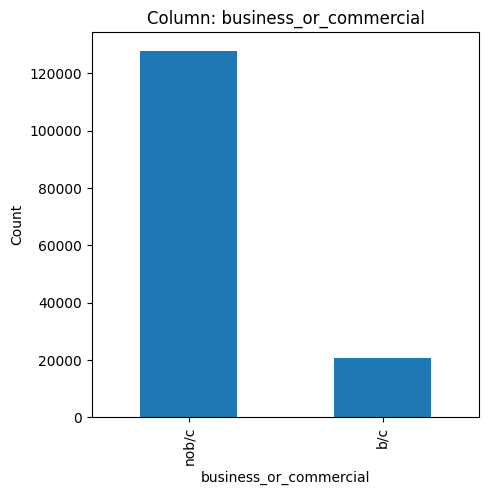

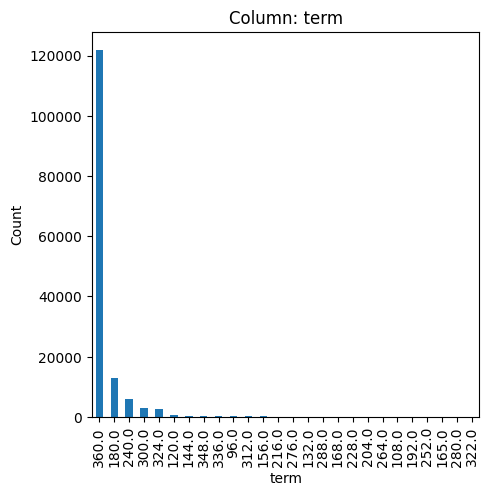

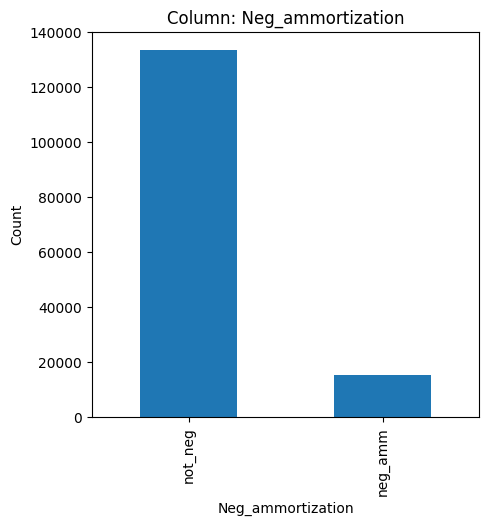

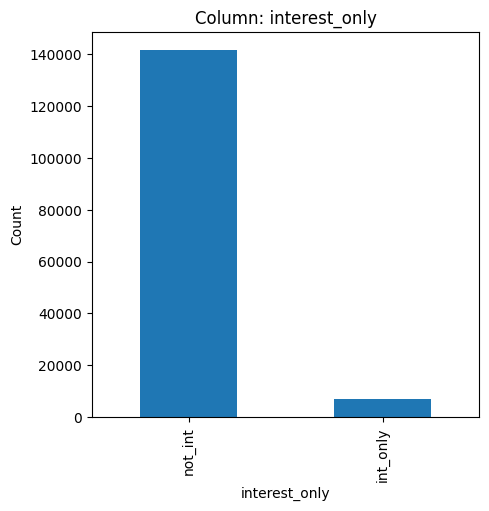

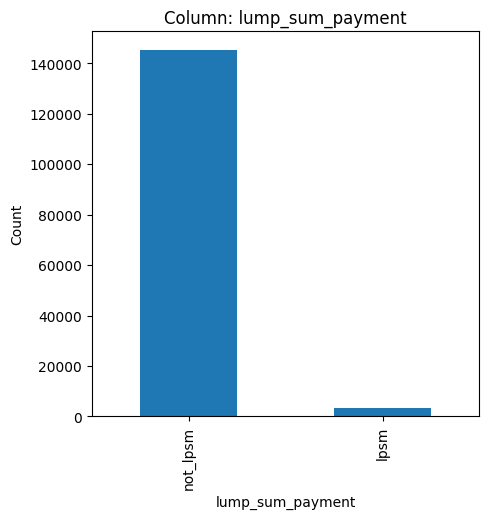

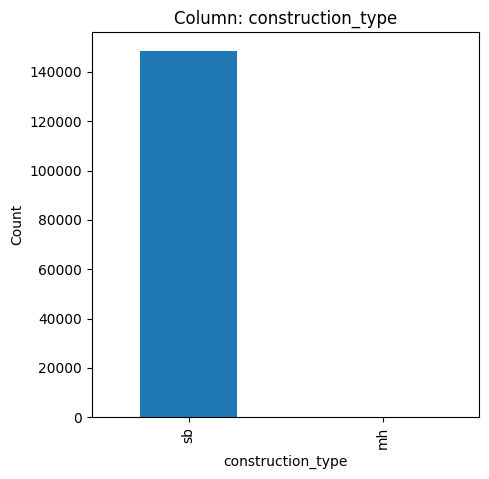

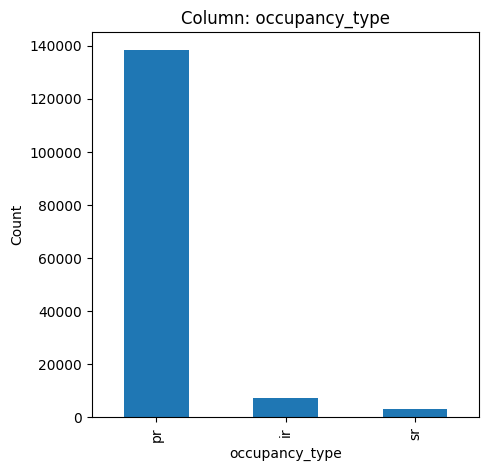

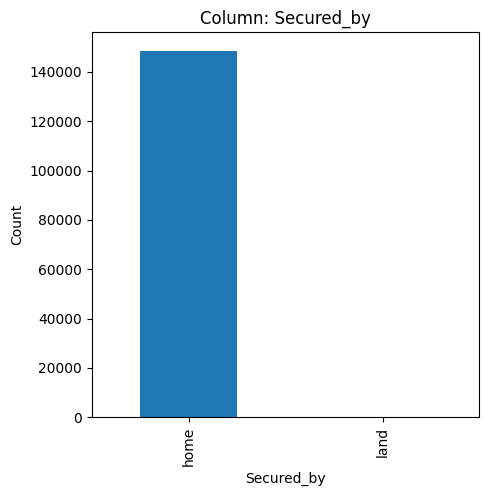

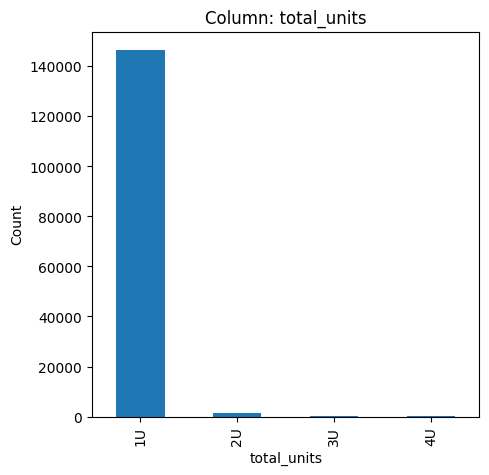

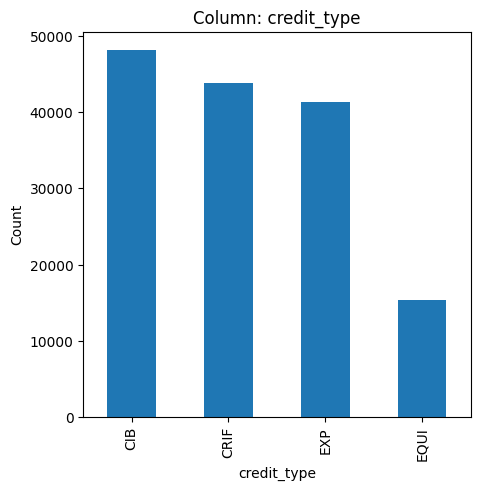

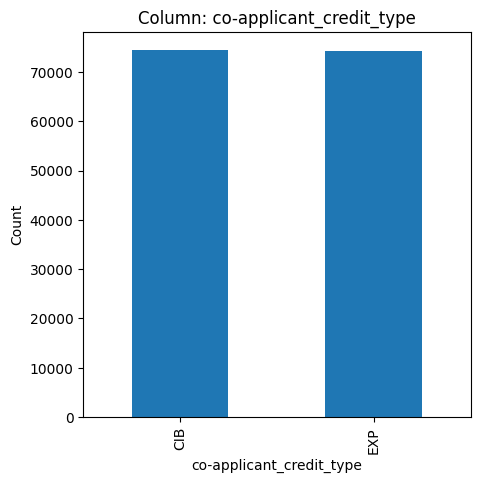

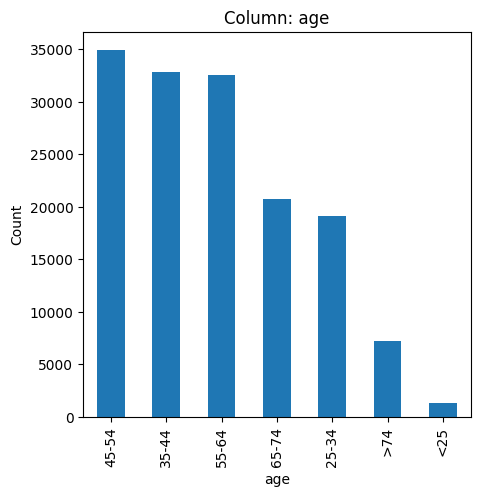

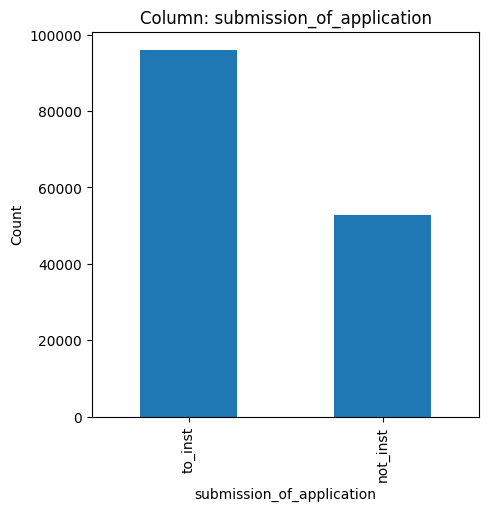

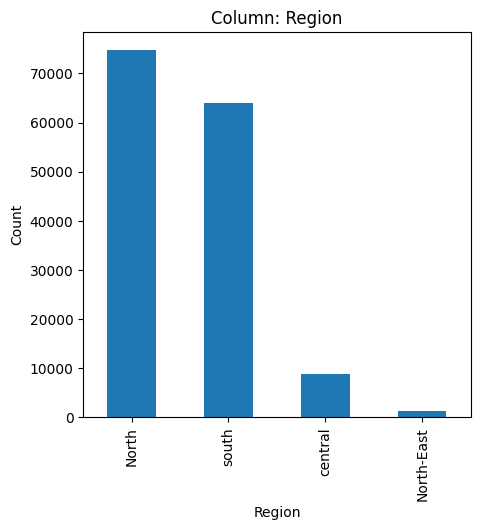

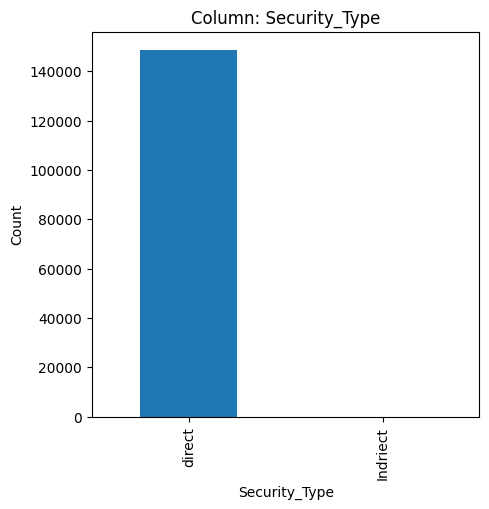

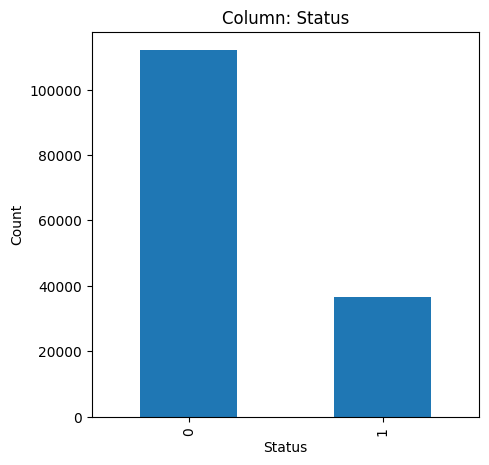

In [260]:
# plotting categorical columns
for col in categorical_cols:
    fig = plt.figure(figsize = (5, 5))
    df_1_cat[col].value_counts().plot(kind='bar') 
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Column: ' + col)
    plt.show()

In [261]:
# concatenating two dataframes
df_2 = pd.concat([df_1_num, df_1_cat], axis=1, join='inner')

In [262]:
df_2.isnull().sum()

loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
property_value               0
income                       0
Credit_Score                 0
LTV                          0
dtir1                        0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
Status                       0
dtype: i

In [263]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amount                148670 non-null  int64  
 1   rate_of_interest           148670 non-null  float64
 2   Interest_rate_spread       148670 non-null  float64
 3   Upfront_charges            148670 non-null  float64
 4   property_value             148670 non-null  float64
 5   income                     148670 non-null  float64
 6   Credit_Score               148670 non-null  int64  
 7   LTV                        148670 non-null  float64
 8   dtir1                      148670 non-null  float64
 9   loan_limit                 148670 non-null  object 
 10  Gender                     148670 non-null  object 
 11  approv_in_adv              148670 non-null  object 
 12  loan_type                  148670 non-null  object 
 13  loan_purpose               14

loan_amount                Axes(0.125,0.747241;0.352273x0.132759)
rate_of_interest        Axes(0.547727,0.747241;0.352273x0.132759)
Interest_rate_spread       Axes(0.125,0.587931;0.352273x0.132759)
Upfront_charges         Axes(0.547727,0.587931;0.352273x0.132759)
property_value             Axes(0.125,0.428621;0.352273x0.132759)
income                  Axes(0.547727,0.428621;0.352273x0.132759)
Credit_Score                Axes(0.125,0.26931;0.352273x0.132759)
LTV                      Axes(0.547727,0.26931;0.352273x0.132759)
dtir1                          Axes(0.125,0.11;0.352273x0.132759)
dtype: object

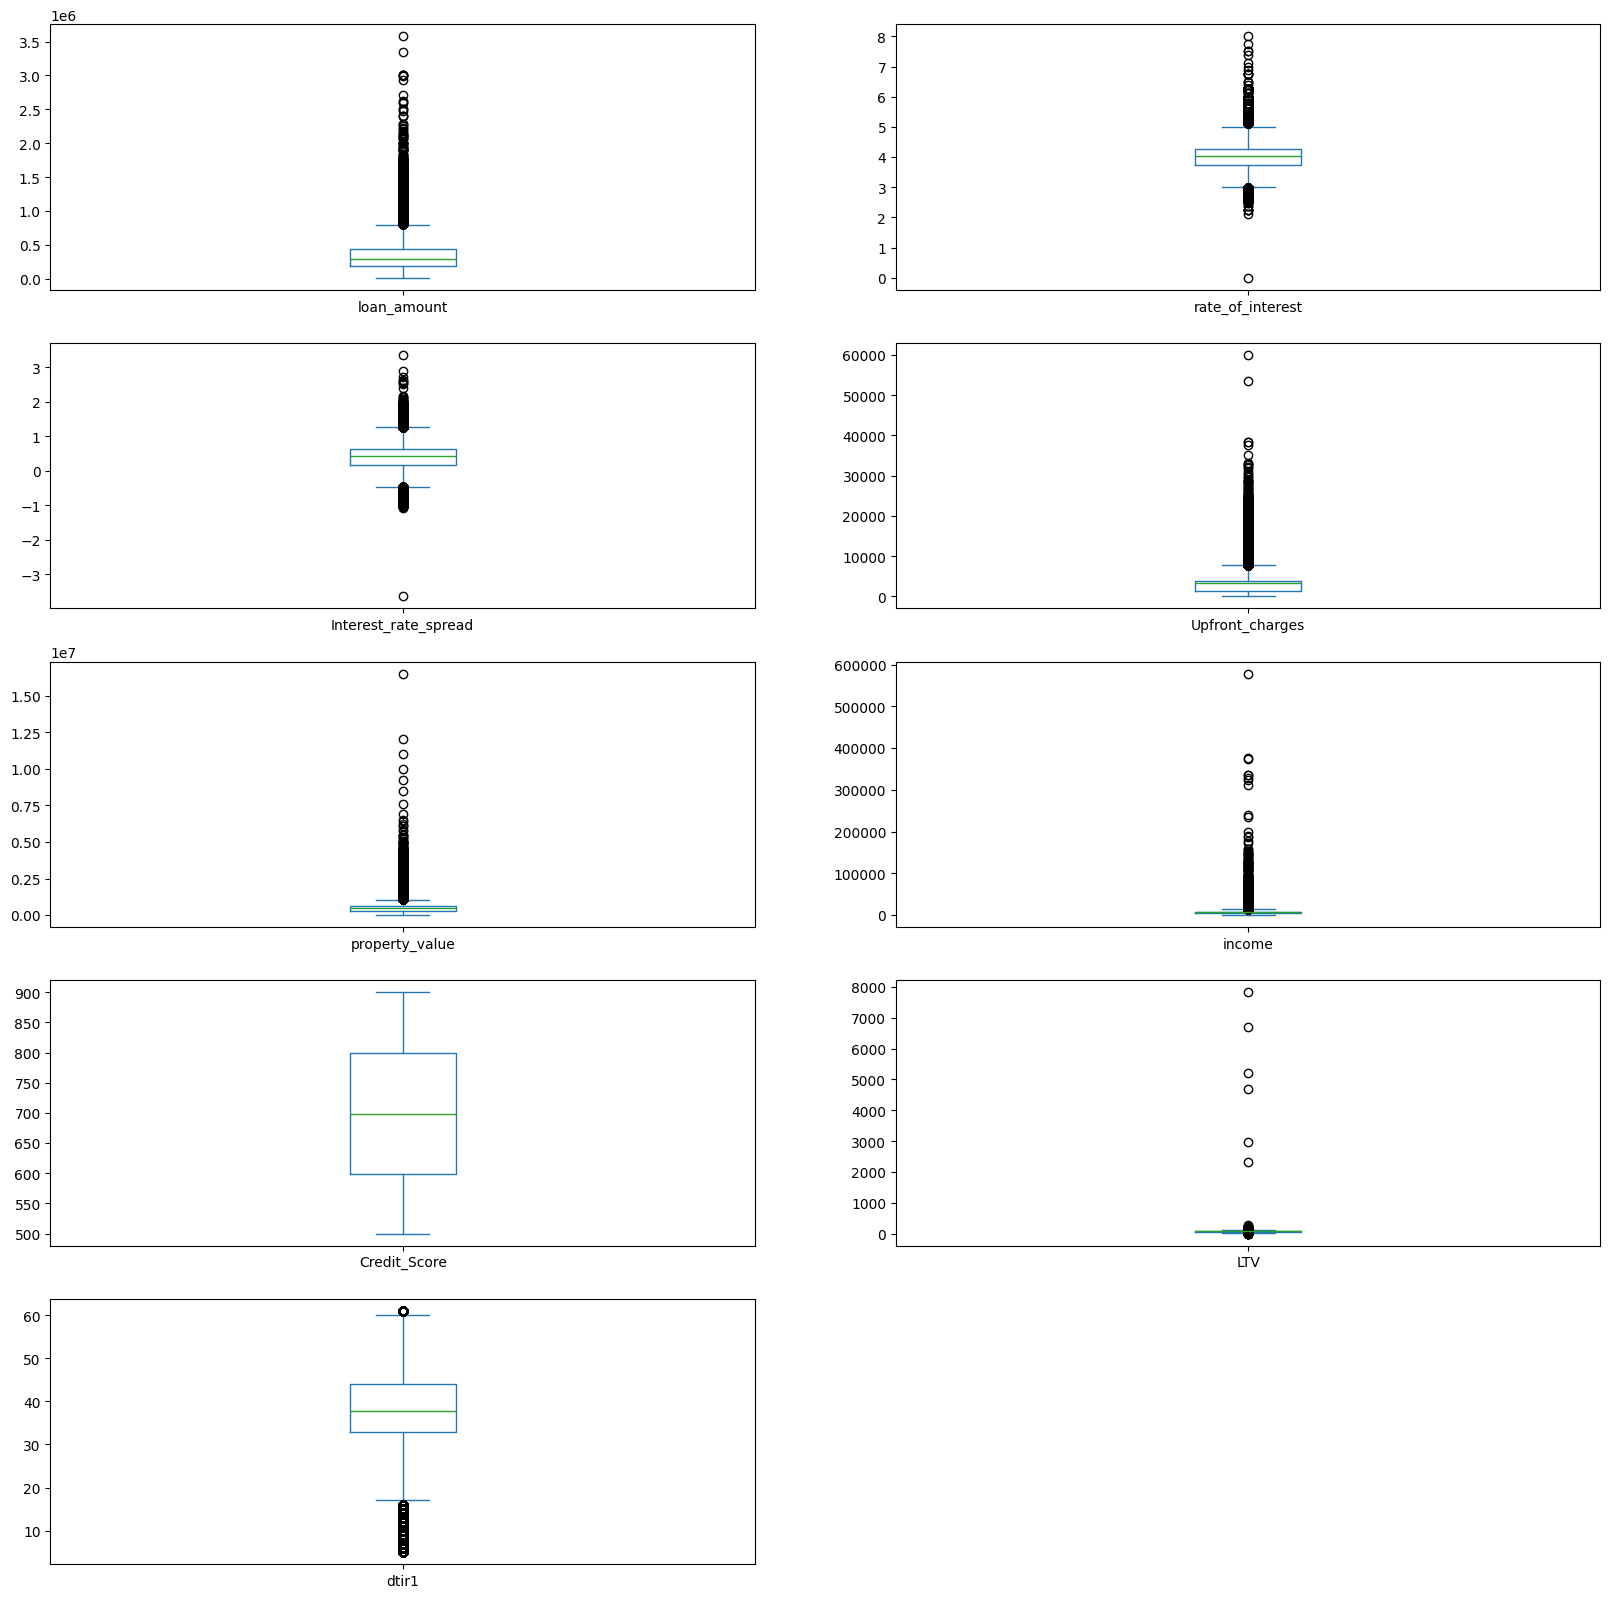

In [264]:
# outlier detection
df_2.plot(kind="box",subplots=True,layout=(5,2),figsize=(20,20))

In [265]:
df_2.shape

(148670, 32)

In [266]:
df_3 = df_2.copy()

In [267]:
# removing outliers
for col in numerical_cols:
    iqr = 1.5 * (np.percentile(df_3[col], 75) - np.percentile(df_3[col], 25))
    upper_bound = iqr + np.percentile(df_3[col], 75)
    lower_bound = np.percentile(df_3[col], 25) - iqr
    df_3.drop(df_3[(df_3[col] > upper_bound) | (df_3[col] < lower_bound)].index, inplace=True)

In [268]:
df_3.shape

(99925, 32)

loan_amount                Axes(0.125,0.747241;0.352273x0.132759)
rate_of_interest        Axes(0.547727,0.747241;0.352273x0.132759)
Interest_rate_spread       Axes(0.125,0.587931;0.352273x0.132759)
Upfront_charges         Axes(0.547727,0.587931;0.352273x0.132759)
property_value             Axes(0.125,0.428621;0.352273x0.132759)
income                  Axes(0.547727,0.428621;0.352273x0.132759)
Credit_Score                Axes(0.125,0.26931;0.352273x0.132759)
LTV                      Axes(0.547727,0.26931;0.352273x0.132759)
dtir1                          Axes(0.125,0.11;0.352273x0.132759)
dtype: object

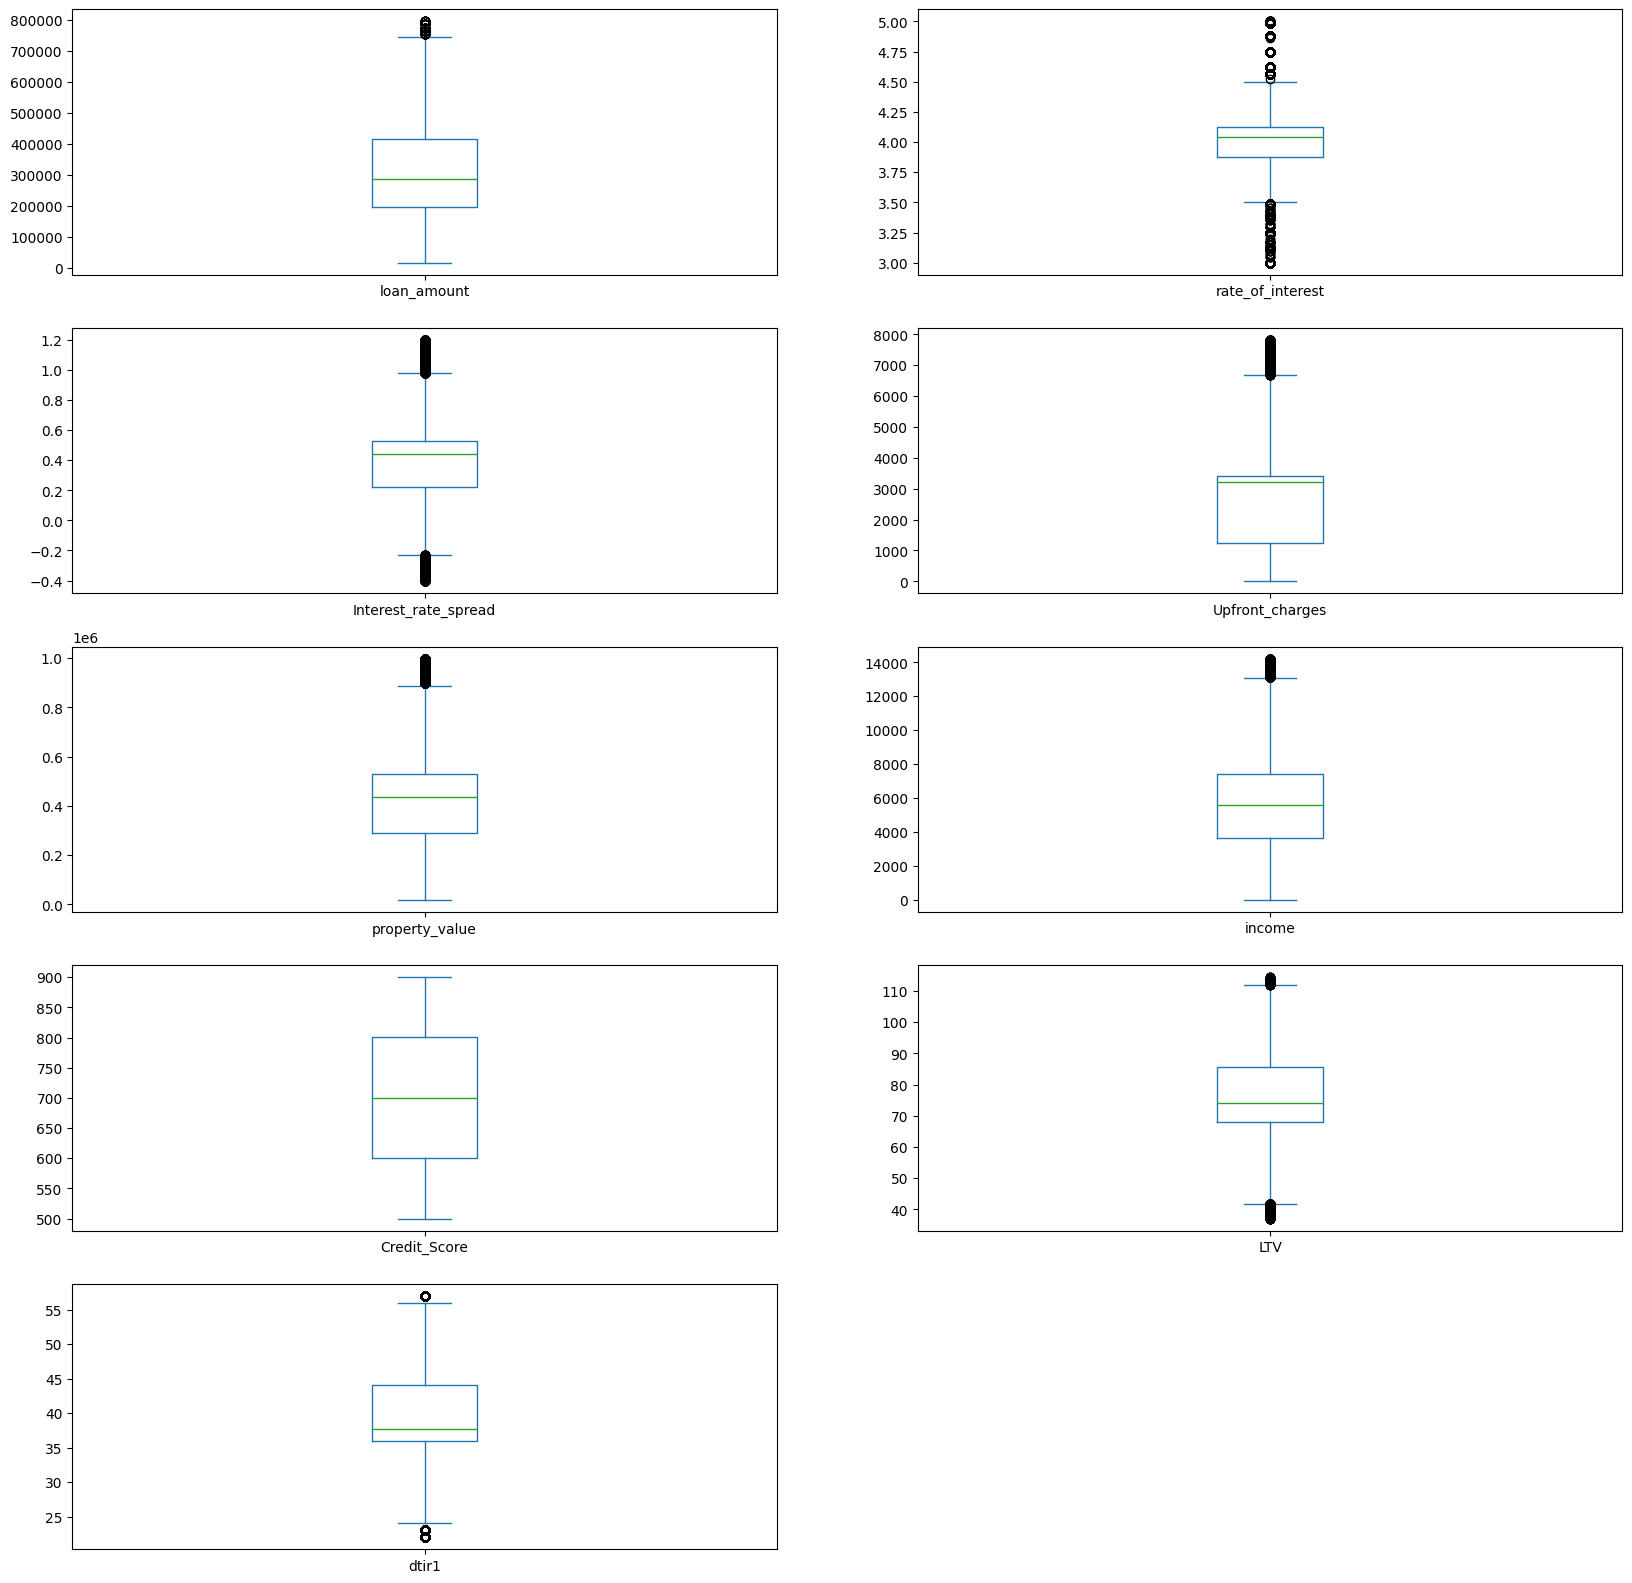

In [269]:
# after removing
df_3.plot(kind="box",subplots=True,layout=(5,2),figsize=(20,20))

In [270]:
# descriptive statistics
df_3.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,income,Credit_Score,LTV,dtir1
count,99925.000000,99925.000000,99925.000000,99925.000000,99925.000000,99925.000000,99925.000000,99925.000000,99925.000000
mean,314311.758819,4.032133,0.405614,2802.781935,438126.325609,5859.265769,699.900065,75.379388,39.018782
std,149070.345433,0.376578,0.317327,1885.719012,191802.519246,2813.383773,115.861362,14.283733,7.073346
min,16500.000000,3.000000,-0.405400,0.000000,18000.000000,0.000000,500.000000,37.068966,22.000000
25%,196500.000000,3.875000,0.221500,1235.000000,288000.000000,3660.000000,600.000000,68.081761,36.000000
50%,286500.000000,4.045476,0.441656,3224.996127,438000.000000,5580.000000,700.000000,73.948598,37.732932
75%,416500.000000,4.125000,0.524500,3419.250000,528000.000000,7440.000000,801.000000,85.590278,44.000000
max,796500.000000,5.000000,1.199300,7816.500000,998000.000000,14220.000000,900.000000,114.365672,57.000000


In [271]:
# change dtype of Status from object to int64
df_3 = df_3.astype({'Status':'int64'})

In [272]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99925 entries, 0 to 148668
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_amount                99925 non-null  int64  
 1   rate_of_interest           99925 non-null  float64
 2   Interest_rate_spread       99925 non-null  float64
 3   Upfront_charges            99925 non-null  float64
 4   property_value             99925 non-null  float64
 5   income                     99925 non-null  float64
 6   Credit_Score               99925 non-null  int64  
 7   LTV                        99925 non-null  float64
 8   dtir1                      99925 non-null  float64
 9   loan_limit                 99925 non-null  object 
 10  Gender                     99925 non-null  object 
 11  approv_in_adv              99925 non-null  object 
 12  loan_type                  99925 non-null  object 
 13  loan_purpose               99925 non-null  object 

In [273]:
categorical_cols.remove('Status')
numerical_cols.append('Status')

<Axes: >

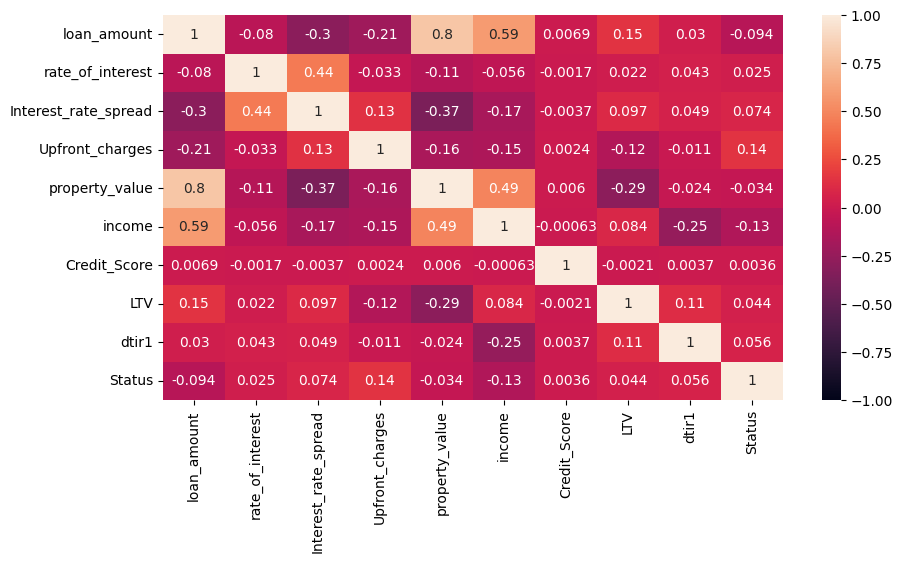

In [274]:
# correlation analysis
corr = df_3[numerical_cols].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(data = corr, vmin=-1, vmax=1, annot=True)